In [4]:
#import Library
import pandas as pd
import numpy as np
import seaborn as sns


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [5]:
# import librarys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
    # Read the dataSet
too = pd.read_csv("./income.csv",na_values=" ?")
too.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [7]:
tot = too.copy()

In [8]:
tot.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [9]:
# remove the missing Value
missing = tot[tot.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [10]:
# Delete Missing Value
tot1=tot.dropna(axis=0)
print(tot1)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [11]:
tot = tot1.copy()

In [12]:
# We can see All of missing Data Deleted
tot.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [13]:
tot["JobType"].value_counts()
# tot["SalStat"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: JobType, dtype: int64

In [14]:
corrlation = tot.corr()

In [15]:
print(corrlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [16]:
tot.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [17]:
gender = pd.crosstab(index=tot["gender"],
                    columns="count",
                     margins=True,
                    normalize=True
                    )
print(gender)

col_0       count       All
gender                     
 Female  0.324315  0.324315
 Male    0.675685  0.675685
All      1.000000  1.000000


In [18]:
sal = pd.crosstab( index =tot["gender"],
                   columns=tot["SalStat"],
                   margins=True,
                   normalize = "index")


print(sal)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


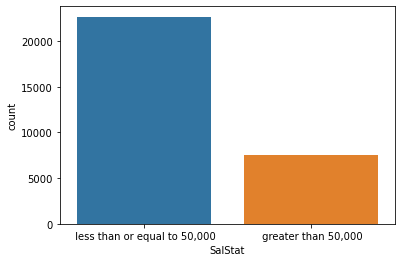

In [19]:
Salstat = sns.countplot(tot["SalStat"])

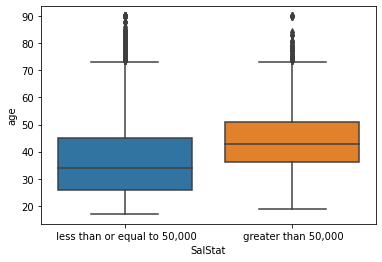

In [20]:
sns.boxplot("SalStat","age",data = tot)

In [21]:
tot.groupby("SalStat")["age"].median()

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

In [22]:
tot.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


### Logistic Regresion Model
- Logistic Regresion Model is a machine Learning classification algorithm that used for predict the catagorical dependent model


#### Reindexing the SalStat to 0,1
- becuse machaine Learning algorithm can not work whit catagorical object.


In [23]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   JobType        30162 non-null  object
 2   EdType         30162 non-null  object
 3   maritalstatus  30162 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   30162 non-null  object
 6   race           30162 non-null  object
 7   gender         30162 non-null  object
 8   capitalgain    30162 non-null  int64 
 9   capitalloss    30162 non-null  int64 
 10  hoursperweek   30162 non-null  int64 
 11  nativecountry  30162 non-null  object
 12  SalStat        30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.5+ MB


In [24]:
tot['SalStat'] = tot['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})

In [25]:
print(tot["SalStat"])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


In [26]:
cols = ['gender','nativecountry','race','JobType']
new_tot = tot.drop(cols,axis=1)
new_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 31977
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30162 non-null  int64 
 1   EdType         30162 non-null  object
 2   maritalstatus  30162 non-null  object
 3   occupation     30162 non-null  object
 4   relationship   30162 non-null  object
 5   capitalgain    30162 non-null  int64 
 6   capitalloss    30162 non-null  int64 
 7   hoursperweek   30162 non-null  int64 
 8   SalStat        30162 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.6+ MB


In [27]:
ror = new_tot.copy()

In [28]:
ror.head()

,age,EdType,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,SalStat
0,45,HS-grad,Divorced,Adm-clerical,Not-in-family,0,0,28,0
1,24,HS-grad,Never-married,Armed-Forces,Own-child,0,0,40,0
2,44,Some-college,Married-civ-spouse,Prof-specialty,Husband,0,0,40,1
3,27,9th,Never-married,Craft-repair,Other-relative,0,0,40,0
4,20,Some-college,Never-married,Sales,Not-in-family,0,0,35,0


In [29]:
ror = pd.get_dummies(ror,drop_first=True)


In [30]:
#Storing the columns name
column_list = list(ror.columns)
print(column_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [31]:
#seprating the input nams from data
features = list(set(column_list)-set(['SalStat']))
print(features)

['EdType_ 11th', 'occupation_ Priv-house-serv', 'occupation_ Exec-managerial', 'EdType_ Assoc-acdm', 'occupation_ Other-service', 'relationship_ Other-relative', 'hoursperweek', 'occupation_ Armed-Forces', 'maritalstatus_ Married-AF-spouse', 'occupation_ Transport-moving', 'EdType_ Prof-school', 'relationship_ Own-child', 'occupation_ Machine-op-inspct', 'occupation_ Sales', 'EdType_ Masters', 'relationship_ Not-in-family', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'EdType_ HS-grad', 'occupation_ Protective-serv', 'capitalloss', 'maritalstatus_ Married-spouse-absent', 'EdType_ Assoc-voc', 'EdType_ 12th', 'maritalstatus_ Never-married', 'capitalgain', 'occupation_ Prof-specialty', 'age', 'occupation_ Tech-support', 'relationship_ Unmarried', 'EdType_ Some-college', 'EdType_ 7th-8th', 'maritalstatus_ Widowed', 'EdType_ Doctorate', 'EdType_ Bachelors', 'occupation_ Craft-repair', 'EdType_ Preschool', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Separated', 'E

In [32]:
#storing the output values in y
y=ror['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [33]:
#Storing the values from output features
x = ror[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [34]:
#Spliting the data in train and test 
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size =0.3,random_state = 0)

In [35]:
#Make and instance of Model
logistic = LogisticRegression()

In [36]:
logistic.fit(train_x,train_y)

C:\Users\Computer House\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
prediction = logistic.predict(test_x)
# print(prediction)

In [38]:
accurcy_score = accuracy_score(test_y,prediction)
print(accurcy_score)

0.8342358271632224


### KNN
- what is KNN?
    - ???

In [39]:
#importing KNN Lybrary
from sklearn.neighbors import KNeighborsClassifier


In [40]:
#import library for ployting
import matplotlib.pyplot as plt

In [42]:
# Storing the K nearest naighbros classifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5)

In [43]:
# fitting the value for x and y
KNN_Classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
# Predi